## 一些 Python 中的数据结构


In [ ]:
# 一个提醒
# 比如这里想记录 l1 和 l2 中相同的元素个数
l1, l2 = [1,2,3,0], [4,5,6,0]

# 错误: 两个循环是嵌套关系 不是并列, 实际会返回 4*4 种组合
len([1 for a in l1 for b in l2 if a==b])

# 正确: 用 zip 将它们打包成一个 sequence 就能同时迭代了
len([1 for a,b in zip(l1,l2) if a==b])
sum([a==b for a,b in zip(l1,l2)])   # 或利用布尔值0/1直接加出结果


* Data Abstaction 的哲学方法论

每层抽象都不会使用其以下的更高抽象层元件

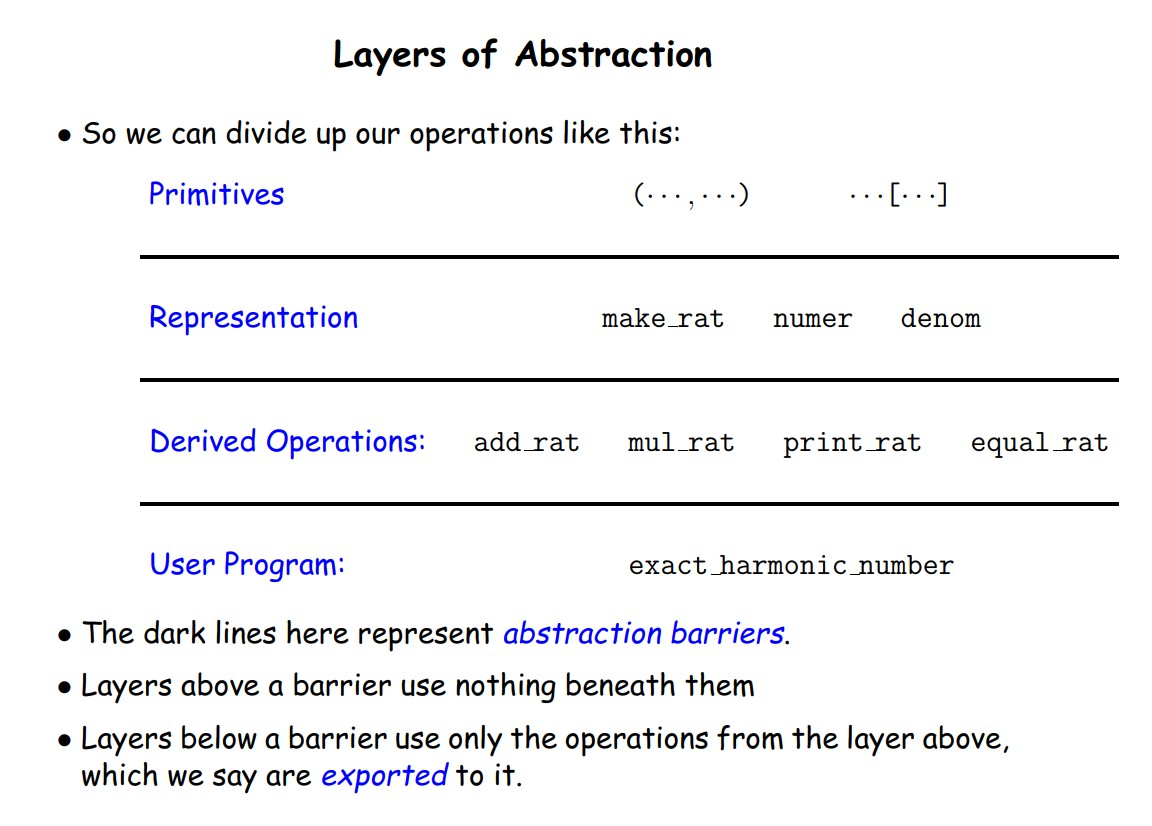

* Abstraction of **Tree**

树是一种方便递归的结构，因为每个节点都可以看作一个子树（的根）

我们期望实现以下一些抽象

    tree(label, children): return a tree with 'label' as its root and 'children' as its children
    label(tree): return the label of root node of 'tree'
    children(tree): return the children of 'tree' (another tree)
    is_leaf(tree): return if 'tree' is leaf node

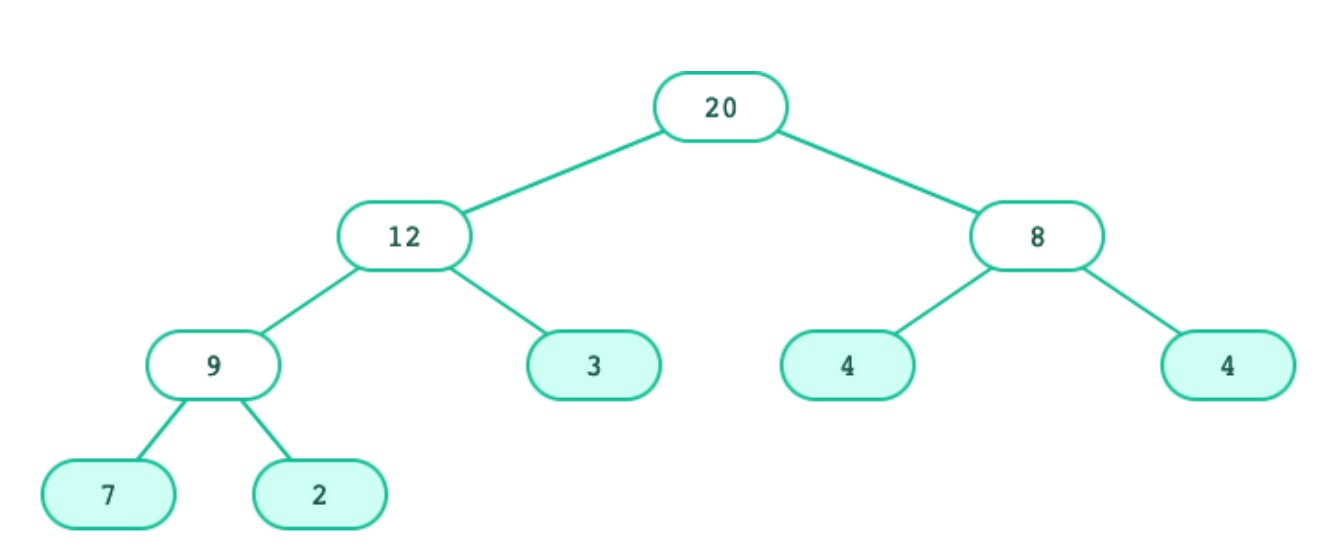

1. 用列表来代表一棵树，第一项为 label，后面依次为孩子，如果仍为树，也依次存成列表

`[20, [12, [9, [7], [2]], [3]], [8, [4], [4]]]`

In [5]:
def tree(label, chirdren=[]):
    return [label] + chirdren

def label(tree):
    return tree[0]

def children(tree):
    return tree[1:] # 第一项以后所有的列表

def is_leaf(tree):
    return len(children(tree)) == 0

sample = tree(20, [tree(12, [tree(9, [tree(7), tree(2)]), tree(3)]),
                   tree(8, [tree(4), tree(4)])])


2. （是比第1种查找起来稍微更有效率一点的结构）用 tuple 来表示一颗树，把一个节点的孩子都放进列表里括起来，把列表放在 tuple 的第二项

`(20, [(12, [(9, [(7, []),(2, [])]),(3, [])]),(8, [(4, []), (4, [])])])`

而且视觉上对 label 和子树的结束更容易分辨（圆括号是子树结尾）

* 但是这其实没有意义，如果最终打印整棵树的时候以上述格式，**意味着暴露了底层实现的具体结构**，这是违反 Data Abstraction 原则的。所以其实最终都要完善打印格式，两种抽象方法没什么区别

In [ ]:
def tree(label, chirdren=[]):
    return (label, chirdren)

def label(tree):
    return tree[0]

def children(tree):
    return tree[1]

def is_leaf(tree):
    return len(children(tree)) == 0

sample = tree(20, [tree(12, [tree(9, [tree(7), tree(2)]), tree(3)]),
                   tree(8, [tree(4), tree(4)])])


3. 用字典来存，label 存在 `key = "l"` 里，children 存在 `key = "c"` 里，本质上和第二种没区别，省略代码...

In [ ]:
# Compute leaf of a tree recursively
def count_leaf(tree):
    if is_leaf(tree):
        return 1
    else:
        children_leaves = 0
        for sub_tree in children(tree):
            children_leaves += count_leaf(sub_tree)
        return children_leaves